In [2]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt


In [3]:
books=pd.read_csv("../datasets/book/Books.csv")
users= pd.read_csv("../datasets/book/Users.csv")
ratings= pd.read_csv("../datasets/book/Ratings.csv")

C:\Users\baduk\AppData\Local\Temp\ipykernel_8568\2383848602.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv("../datasets/book/Books.csv")


In [4]:
books.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
users.head()


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [7]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [7]:
users.isnull().sum()


User-ID          0
Location         0
Age         110762
dtype: int64

In [8]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [11]:
books.duplicated().sum()


np.int64(0)

In [12]:
users.duplicated().sum()

np.int64(0)

In [13]:
ratings.duplicated().sum()

np.int64(0)

## Popularity based recommendation 

In [10]:
book_name_rating=ratings.merge(books,on="ISBN")

In [11]:
num_rating_df=book_name_rating.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_rating'},inplace=True)
num_rating_df

,Book-Title,num_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [12]:
avg_rating_df = book_name_rating.groupby('Book-Title')['Book-Rating'].mean().reset_index().rename(columns={'Book-Rating': 'avg_rating'})
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [13]:
popular_books_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_books_df

,Book-Title,num_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [14]:
popular_books_df= popular_books_df[popular_books_df['num_rating']>=250].sort_values('avg_rating',ascending=False).head(50)

In [15]:
popular_books_df=popular_books_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_rating','avg_rating']]


## Top 10 Most Rated Books

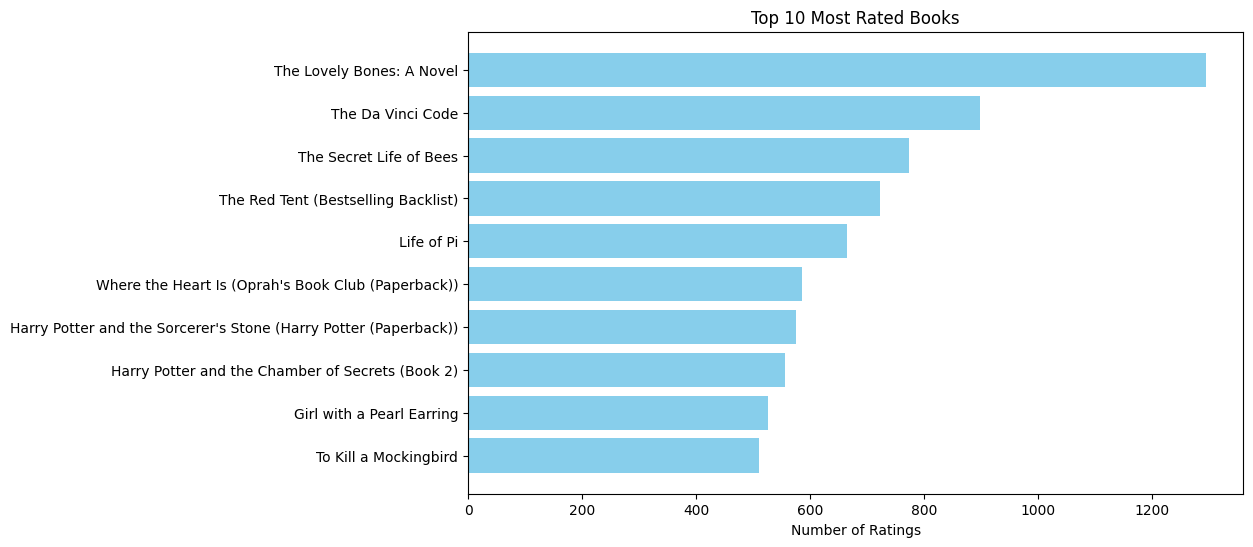

In [12]:

top_rated_by_count = popular_books_df.sort_values(by='num_rating', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_rated_by_count['Book-Title'], top_rated_by_count['num_rating'], color='skyblue')
plt.xlabel('Number of Ratings')
plt.title('Top 10 Most Rated Books')
plt.gca().invert_yaxis()
plt.show()


## Top 10 Highest Rated Books

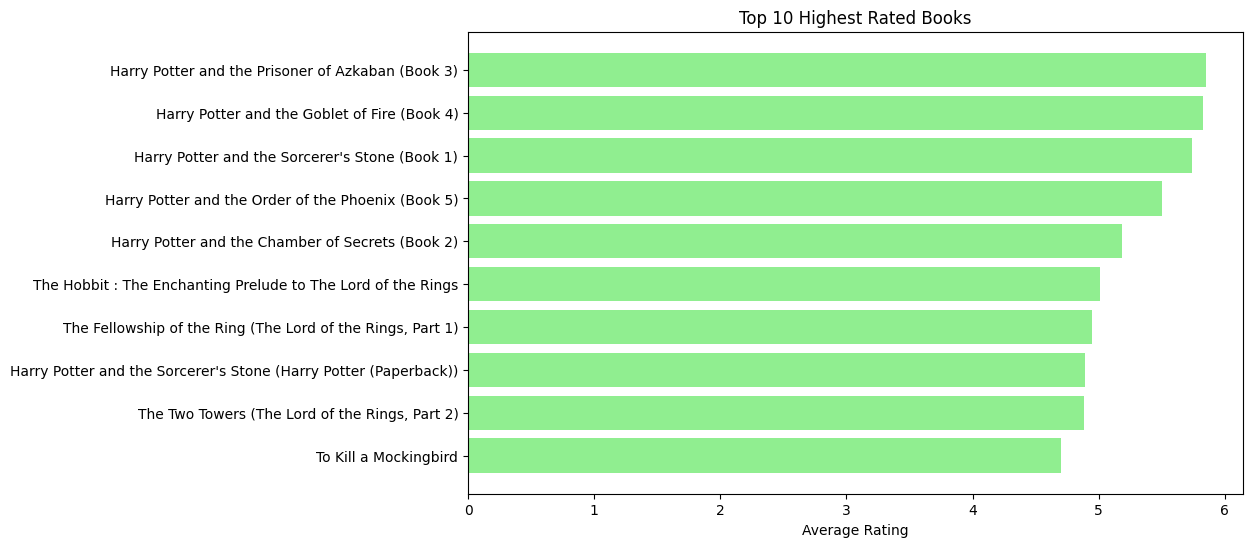

In [13]:
top_rated_by_score = popular_books_df.sort_values(by='avg_rating', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_rated_by_score['Book-Title'], top_rated_by_score['avg_rating'], color='lightgreen')
plt.xlabel('Average Rating')
plt.title('Top 10 Highest Rated Books')
plt.gca().invert_yaxis()
plt.show()


##  Distribution of Average Ratings

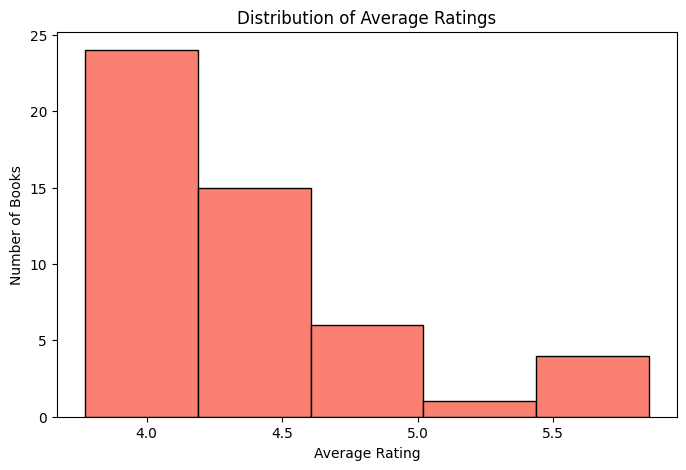

In [14]:
plt.figure(figsize=(8, 5))
plt.hist(popular_books_df['avg_rating'], bins=5, edgecolor='black', color='salmon')
plt.xlabel('Average Rating')
plt.ylabel('Number of Books')
plt.title('Distribution of Average Ratings')
plt.show()


## Collaborative Filtering Based Recommender System

### Step 1: Filter users who have given more than 200 ratings

In [16]:
user_rating_counts = book_name_rating.groupby('User-ID').count()['Book-Rating']> 200
active_users = user_rating_counts[user_rating_counts].index

### Step 2: Keep only ratings from active users

In [17]:
filtered_ratings=book_name_rating[book_name_rating['User-ID'].isin(active_users)]


### Step 3: Filter books that have received at least 50 ratings

In [18]:
book_rating_counts=filtered_ratings.groupby('Book-Title').count()['Book-Rating']>= 50
popular_books = book_rating_counts[book_rating_counts].index


### Step 4: Keep only ratings for popular books

In [19]:
final_filtered_ratings = filtered_ratings[filtered_ratings['Book-Title'].isin(popular_books)]

### Step 5: Create pivot table (Book vs User) with ratings

In [20]:
book_user_matrix = final_filtered_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
book_user_matrix.fillna(0,inplace=True)
book_user_matrix


User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from sklearn.metrics.pairwise import cosine_similarity


In [22]:
similarity_scores=cosine_similarity(book_user_matrix)

In [23]:
similarity_scores.shape

(706, 706)

In [24]:
def recommend_book(book_title):
    # Fetch the index of the selected book
    book_index = np.where(book_user_matrix.index == book_title)[0][0]

    # Get the similarity scores for that book
    distances = similarity_scores[book_index]
    
    # Get list of similar books with their similarity scores
    similar_books = sorted(
        list(enumerate(distances)),
        key=lambda x: x[1],
        reverse=True
    )[1:5]  # Exclude the selected book itself

    recommendations = []
    for similarity_entry in similar_books:
        similar_book_index = similarity_entry[0]
        similar_book_title = book_user_matrix.index[similar_book_index]
        
        book_info = books[books['Book-Title'] == similar_book_title].drop_duplicates('Book-Title')
        
        details = []
        details.append(book_info['Book-Title'].values[0])
        details.append(book_info['Book-Author'].values[0])
        details.append(book_info['Image-URL-M'].values[0])
        
        recommendations.append(details)
    
    return recommendations


In [25]:
recommend_book('Naked')

[['Me Talk Pretty One Day',
  'David Sedaris',
  'http://images.amazon.com/images/P/0316776963.01.MZZZZZZZ.jpg'],
 ['Bastard Out of Carolina',
  'Dorothy Allison',
  'http://images.amazon.com/images/P/0452269571.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['Bridget Jones : The Edge of Reason',
  'Helen Fielding',
  'http://images.amazon.com/images/P/0670892963.01.MZZZZZZZ.jpg']]

In [26]:
import pickle
pickle.dump(popular_books_df,open('../models/popular_books_df.pkl','wb'))

In [27]:
books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [30]:
pickle.dump(book_user_matrix,open('../models/book_user_matrix.pkl','wb'))
pickle.dump(books,open('../models/books.pkl','wb'))
pickle.dump(similarity_scores,open('../models/similarity_scores.pkl','wb'))